# 1. - Load the CIFAR-10 dataset
- Load it as we did with the Fashion MNIST and MNIST datasets in the lesson notebooks. Create visualizations of some sample images and their corresponding labels.

| Label	| Description |
| ------|-------------|
| 0 |	airplane |
| 1 |	automobile |
| 2 |	bird |
| 3 |	cat |
| 4 |	deer |
| 5 |	dog |
| 6 |	frog |
| 7 |	horse |
| 8 |	ship |
| 9 |	truck |


In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Rescaling, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

import matplotlib.pyplot as plt

import numpy as np


In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

/tmp/ipython-input-103215067.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


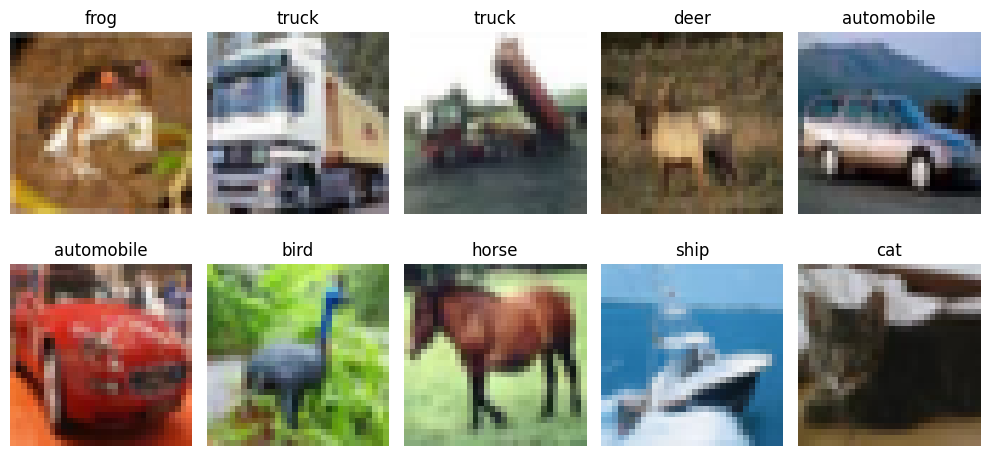

In [ ]:
# Visualize some examples
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

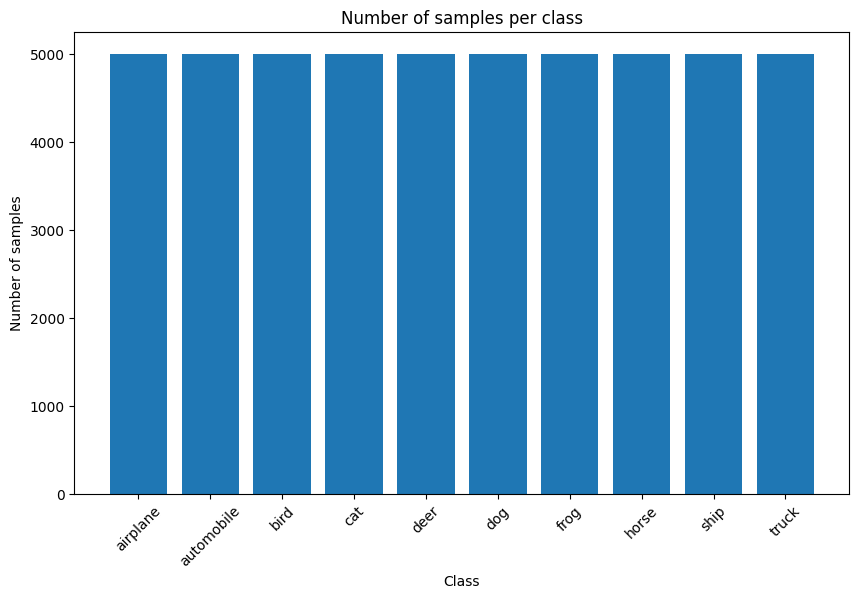

airplane: 5000
automobile: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000


In [ ]:
from collections import Counter

labels = y_train.squeeze()

# Count the number of samples per class
class_counts = Counter(labels)

# Sort by class index
classes = sorted(class_counts.keys())
counts = [class_counts[c] for c in classes]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(class_names, counts)
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Number of samples per class')
plt.xticks(rotation=45)
plt.show()

# Optional: print counts for reference
for cls, count in zip(class_names, counts):
    print(f"{cls}: {count}")

# 2. - Preprocess your data
- Apply normalization, reshaping, label encoding, and resizing as needed.

In [ ]:
# normalization
# Create a preprocessing layer for normalization
normalization_layer = Rescaling(1./255)
X_train = normalization_layer(X_train)      # -> DO NOT RUN TWICE OR MORE!!!
X_test = normalization_layer(X_test)        # -> DO NOT RUN TWICE OR MORE!!!

# reshaping -> we don't need to reshape the data
display(f"X_train shape: {X_train.shape}")
display(f"X_test shape: {X_test.shape}")

# label encoding
# Convert labels to one-hot vectors
y_train_cat = to_categorical(y_train.ravel(), num_classes=10)   # y_train.ravel() -> flatten the y_train because it is 2 dimensional and we need only 1 dimension
y_test_cat = to_categorical(y_test.ravel(), num_classes=10)     # y_test.ravel() -> flatten the y_test because it is 2 dimensional and we need only 1 dimension

'X_train shape: (50000, 32, 32, 3)'

'X_test shape: (10000, 32, 32, 3)'

<tf.Tensor: shape=(50000, 32, 32, 3), dtype=float32, numpy=
array([[[[0.23137257, 0.24313727, 0.24705884],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607845, 0.18823531, 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352945],
         [0.59607846, 0.4901961 , 0.40000004],
         [0.5803922 , 0.48627454, 0.4039216 ]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235297, 0.34509805, 0.21568629],
         [0.4666667 , 0.3254902 , 0.19607845],
         [0.4784314 , 0.34117648, 0.22352943]],

        [[0.09803922, 0.09411766, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215688, 0.10588236, 0.03137255],
         ...,
         [0.46274513, 0.32941177, 0.19607845],
         [0.47058827, 0.32941177, 0.19607845],
         [0.427451  , 0.28627452, 0.16470589]],

        ...,

        [[0.81568635, 0.6666667 

# 3. - Design your CNN models
- Start with a simple architecture, then experiment by increasing the number of layers, filters, and other parameters.

## 3.1 - base model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D

model_base = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(128, activation='relu'),

    Dense(10, activation='softmax')
])

model_base.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_140 (Conv2D)             │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_84 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_141 (Conv2D)             │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_85 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_38 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

## 3.2 - improved model

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', input_shape=(32,32,3)),

    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dropout(0.5),

    Dense(256, activation='relu'),

    Dropout(0.5),

    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_68"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_258 (Conv2D)             │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_259 (Conv2D)             │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_144               │ (None, 14, 14, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_260 (Conv2D)             │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_261 (Conv2D)             │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_145               │ (None, 5, 5, 256)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_68 (Flatten)            │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,029,642 (7.74 MB)

 Trainable params: 2,029,642 (7.74 MB)

 Non-trainable params: 0 (0.00 B)

# 4. - Train your models
- Train at least two different CNN architectures. You can fine-tune hyperparameters such as the number of epochs (consider using early stopping), batch size, and learning rate.

## 4.1 - base model

In [ ]:
model_base.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_base.fit(X_train, y_train_cat, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3868 - loss: 1.6770 - val_accuracy: 0.5758 - val_loss: 1.1966
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6023 - loss: 1.1349 - val_accuracy: 0.6249 - val_loss: 1.0737
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6655 - loss: 0.9611 - val_accuracy: 0.6608 - val_loss: 0.9794
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7070 - loss: 0.8457 - val_accuracy: 0.6676 - val_loss: 0.9635
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7375 - loss: 0.7583 - val_accuracy: 0.6855 - val_loss: 0.9243
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7740 - loss: 0.6501 - val_accuracy: 0.6835 - val_loss: 0.9382
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7955 - loss: 0.5871 - val_accuracy: 0.7009 - val_loss: 0.9224
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8252 - loss: 0.4999 - 

## 4.2 - improved model

- **first attempts:**
  - adding dropout -> accuracy is a bit worse
  - half filters and neurons -> accuracy is a bit worse
  - double filters and neurons -> accuracy is a bit better
  - 4x filters and 2x neurons -> accuracy is a bit better

- **final improvement:**
  - change the structure
    - drop some MAXPooling2D (4 -> 2 | 2x (Conv2D -> Conv2D -> MaxPooling2D))
      - 2 is a good value in combination with 4 Conv2D
        - with 1 val_accuracy is the same, but it is overfitting
    - add Dropout(0.3) before Flatten
      - add Dropout(0.3) before OutputLayer -> +2 accuracy (val)
    - change
  - changing batch size (32 -> 128)
  - reducing number of epochs (10 -> 5)
  - change learning rate (0.001 -> ???)



In [ ]:
optimizer = Adam(0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 128
epochs = 11

history = model.fit(X_train, y_train_cat,
                    batch_size= batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/11
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.2986 - loss: 1.8829 - val_accuracy: 0.5024 - val_loss: 1.3691
Epoch 2/11
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5268 - loss: 1.3245 - val_accuracy: 0.6290 - val_loss: 1.0413
Epoch 3/11
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6173 - loss: 1.0830 - val_accuracy: 0.6546 - val_loss: 0.9641
Epoch 4/11
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6742 - loss: 0.9259 - val_accuracy: 0.7230 - val_loss: 0.7902
Epoch 5/11
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7086 - loss: 0.8344 - val_accuracy: 0.7454 - val_loss: 0.7240
Epoch 6/11
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7381 - loss: 0.7504 - val_accuracy: 0.7634 - val_loss: 0.6730
Epoch 7/11
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7486 - loss: 0.7119 - val_accuracy: 0.7634 - val_loss: 0.6909
Epoch 8/11
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7685 - loss: 0.6652 - val_accuracy: 

# 5. - Evaluate your models
- Report metrics such as accuracy, precision, recall, and F1-score, and visualize the confusion matrix to analyze class-wise performance.

## 5.1 - base model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict class probabilities
y_pred_probs = model_base.predict(X_test)

# Convert probabilities to class predictions
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test  # original integer labels

# Compute metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.6843
Precision: 0.6901
Recall: 0.6843
F1 Score: 0.6838


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.70      0.74      0.72      1000
  automobile       0.78      0.81      0.79      1000
        bird       0.56      0.61      0.59      1000
         cat       0.45      0.54      0.49      1000
        deer       0.66      0.58      0.62      1000
         dog       0.70      0.47      0.56      1000
        frog       0.75      0.80      0.77      1000
       horse       0.75      0.74      0.75      1000
        ship       0.74      0.81      0.78      1000
       truck       0.79      0.74      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


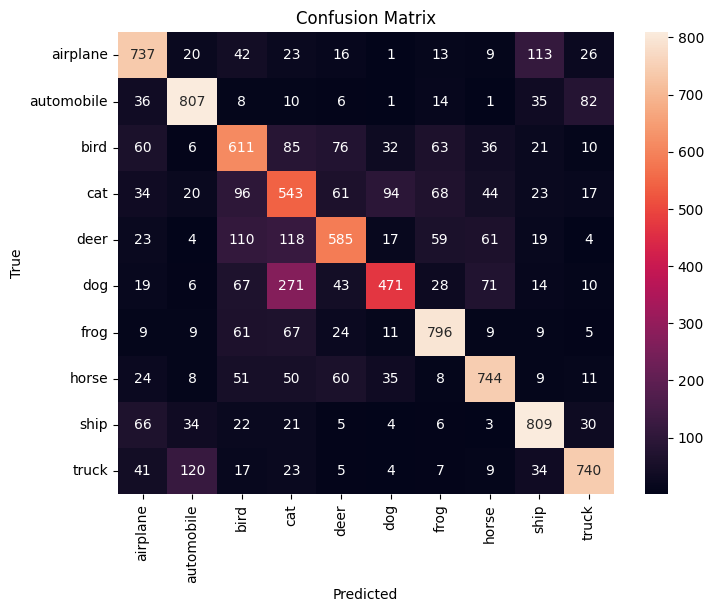

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict & confusion matrix
y_pred = model_base.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

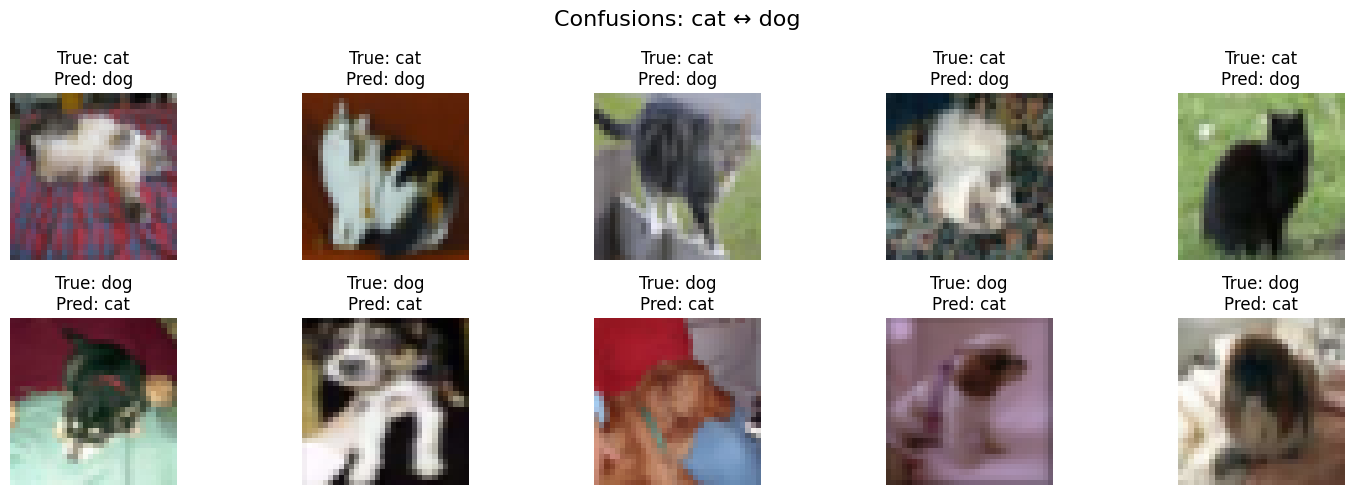

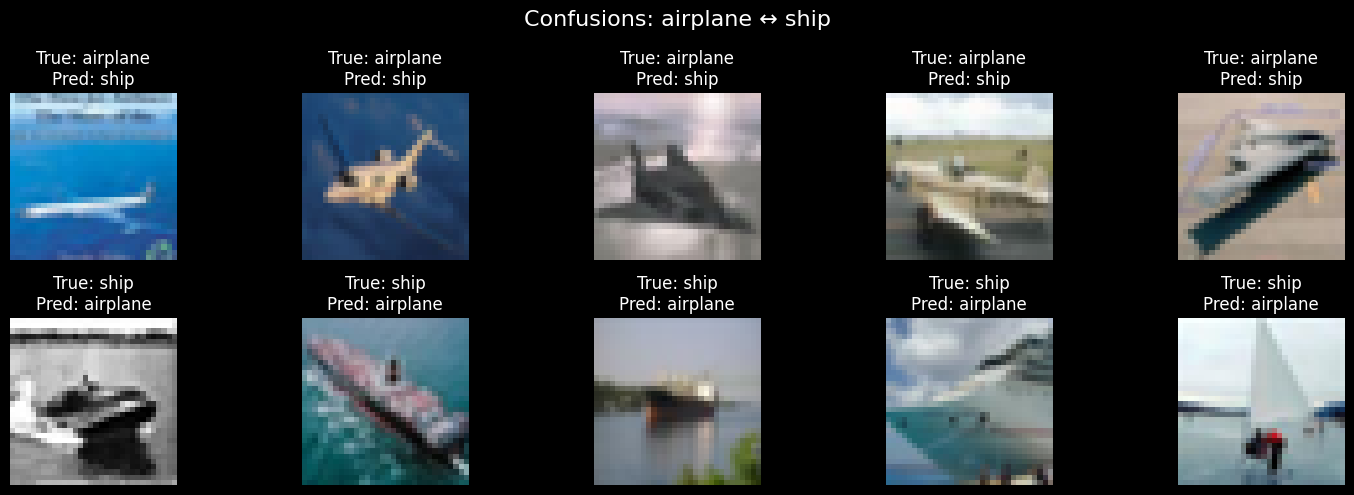

In [ ]:
# Make sure y_pred and y_true are numpy arrays
y_pred = np.array(y_pred).reshape(-1)
y_true = np.array(y_true).reshape(-1)

# Convert X_test to numpy if it's a TensorFlow tensor
X_test_np = X_test.numpy() if hasattr(X_test, 'numpy') else X_test

# Confusing class pairs to inspect
confusing_pairs = [
    (3, 5),  # cat vs dog
    (0, 8)   # airplane vs ship
]

# Function to plot misclassified images between two specific classes
def show_confusion_examples(y_true, y_pred, X, class1, class2, n=5):
    # Find indices of images where class1 was confused with class2 and vice versa
    idx_confused_1 = np.where((y_true == class1) & (y_pred == class2))[0]
    idx_confused_2 = np.where((y_true == class2) & (y_pred == class1))[0]

    fig, axes = plt.subplots(2, n, figsize=(15, 5))
    fig.suptitle(f"Confusions: {class_names[class1]} ↔ {class_names[class2]}", fontsize=16)

    idx1 = idx_confused_1[:n]
    idx2 = idx_confused_2[:n]

    for i in range(n):
        if i < len(idx1):
            ax = axes[0, i]
            ax.imshow(X[idx1[i]])
            ax.set_title(f"True: {class_names[class1]}\nPred: {class_names[class2]}")
            ax.axis('off')
        else:
            axes[0, i].axis('off')

        if i < len(idx2):
            ax = axes[1, i]
            ax.imshow(X[idx2[i]])
            ax.set_title(f"True: {class_names[class2]}\nPred: {class_names[class1]}")
            ax.axis('off')
        else:
            axes[1, i].axis('off')

    plt.tight_layout()
    plt.style.use('dark_background')
    plt.show()

# Show misclassifications for each confusing pair
for class1, class2 in confusing_pairs:
    show_confusion_examples(y_true, y_pred, X_test_np, class1, class2)


## 5.2 - improved model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to class predictions
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test  # original integer labels

# Compute metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Accuracy: 0.7883
Precision: 0.7976
Recall: 0.7883
F1 Score: 0.7901


In [ ]:
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.90      0.73      0.81      1000
  automobile       0.88      0.92      0.90      1000
        bird       0.75      0.66      0.70      1000
         cat       0.59      0.69      0.64      1000
        deer       0.72      0.81      0.76      1000
         dog       0.72      0.71      0.71      1000
        frog       0.87      0.82      0.85      1000
       horse       0.81      0.87      0.84      1000
        ship       0.85      0.90      0.88      1000
       truck       0.92      0.83      0.87      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.80     10000
weighted avg       0.80      0.79      0.80     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


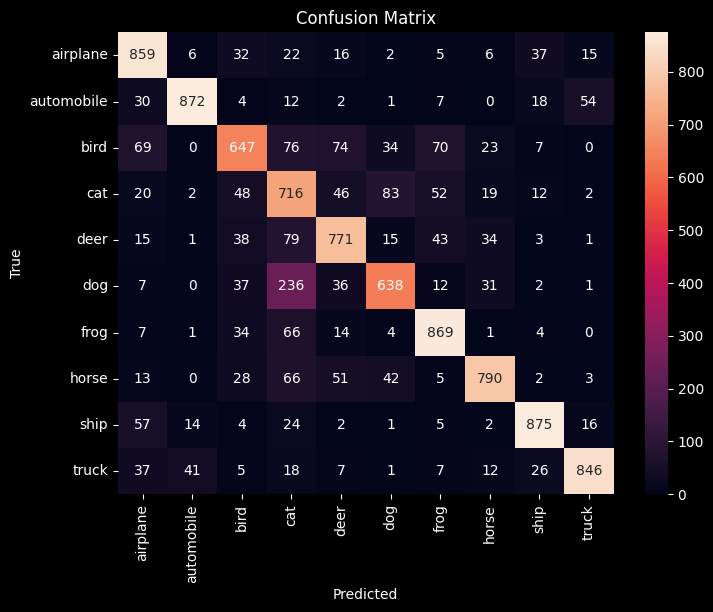

In [ ]:
# Predict & confusion matrix
y_pred = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

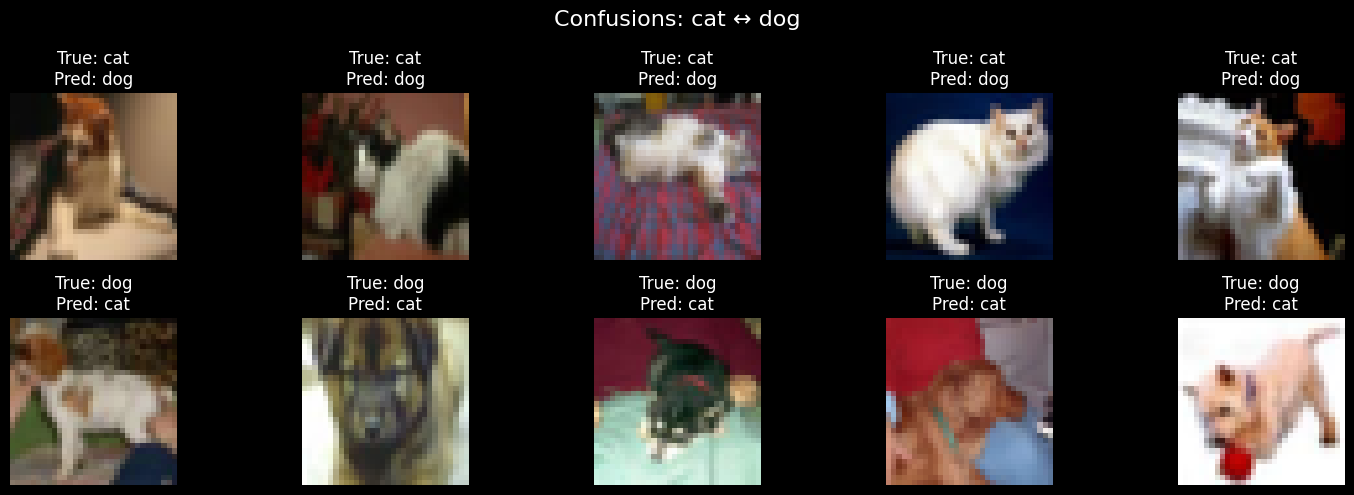

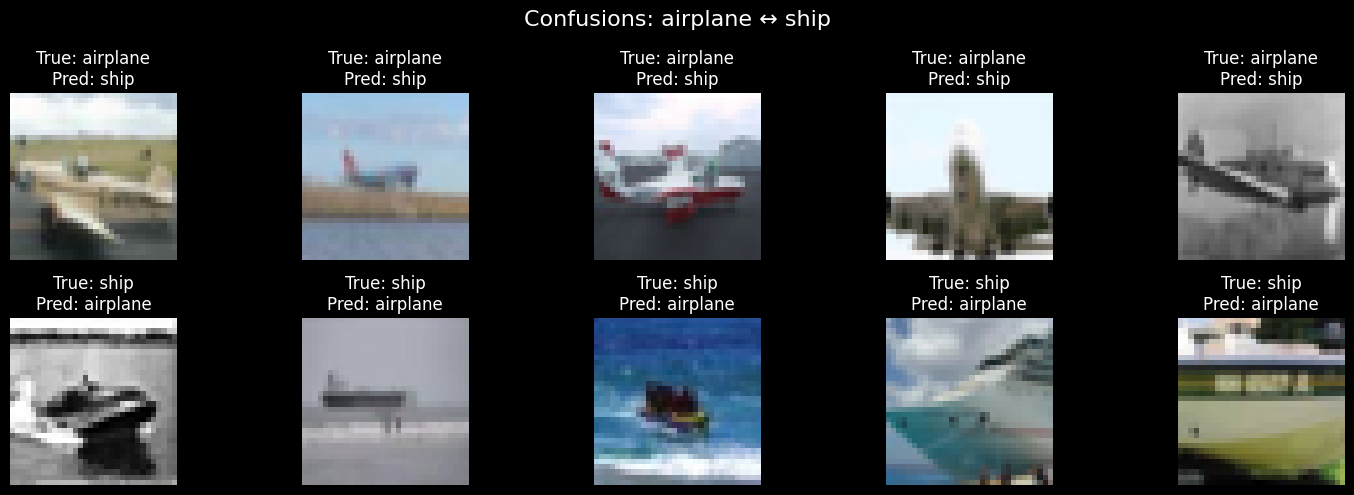

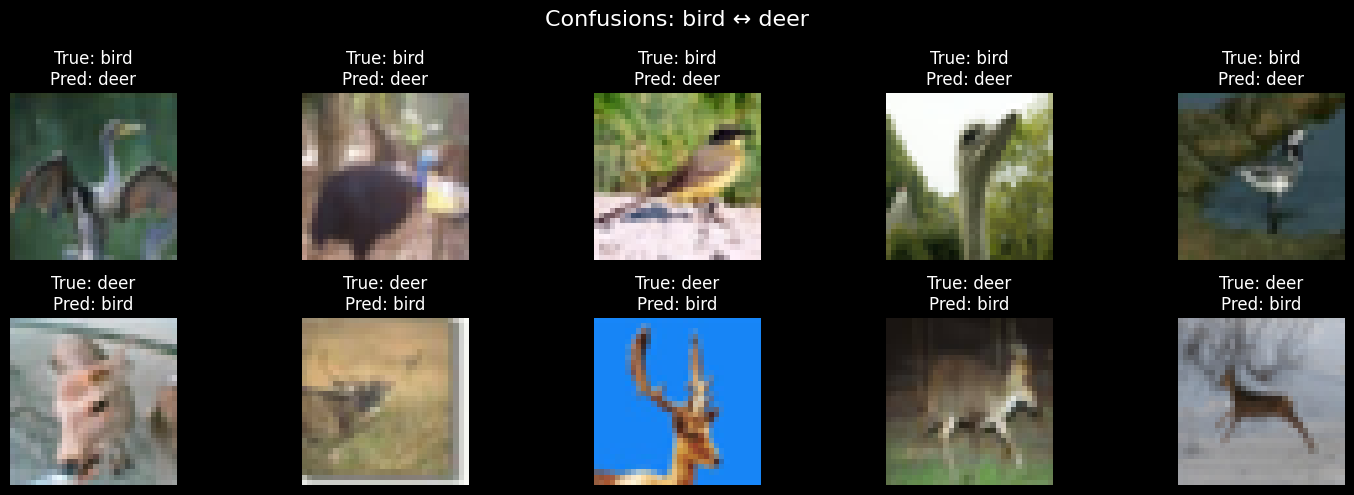

In [ ]:
# Make sure y_pred and y_true are numpy arrays
y_pred = np.array(y_pred).reshape(-1)
y_true = np.array(y_true).reshape(-1)

# Convert X_test to numpy if it's a TensorFlow tensor
X_test_np = X_test.numpy() if hasattr(X_test, 'numpy') else X_test

# Confusing class pairs to inspect
confusing_pairs = [
    (3, 5),  # cat vs dog
    (0, 8),  # airplane vs ship
    (2, 4),  # bird vs deer
]

# Function to plot misclassified images between two specific classes
def show_confusion_examples(y_true, y_pred, X, class1, class2, n=5):
    # Find indices of images where class1 was confused with class2 and vice versa
    idx_confused_1 = np.where((y_true == class1) & (y_pred == class2))[0]
    idx_confused_2 = np.where((y_true == class2) & (y_pred == class1))[0]

    fig, axes = plt.subplots(2, n, figsize=(15, 5))
    fig.suptitle(f"Confusions: {class_names[class1]} ↔ {class_names[class2]}", fontsize=16)

    idx1 = idx_confused_1[:n]
    idx2 = idx_confused_2[:n]

    for i in range(n):
        if i < len(idx1):
            ax = axes[0, i]
            ax.imshow(X[idx1[i]])
            ax.set_title(f"True: {class_names[class1]}\nPred: {class_names[class2]}")
            ax.axis('off')
        else:
            axes[0, i].axis('off')

        if i < len(idx2):
            ax = axes[1, i]
            ax.imshow(X[idx2[i]])
            ax.set_title(f"True: {class_names[class2]}\nPred: {class_names[class1]}")
            ax.axis('off')
        else:
            axes[1, i].axis('off')

    plt.tight_layout()
    plt.style.use('dark_background')
    plt.show()

# Show misclassifications for each confusing pair
for class1, class2 in confusing_pairs:
    show_confusion_examples(y_true, y_pred, X_test_np, class1, class2)
